In [8]:
import numpy as np
from matplotlib import pyplot as plt
from torch import Tensor

from src.common.log import logger
from src.dataset.tno_dataset_collection import TnoDatasetCollection
from src.models.common.metrics import relative_error, ssim
from src.plotting.city_emission_field_plot import plot_emission_field_tensor

In [9]:
dataset_collection = TnoDatasetCollection()

[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2015_highres_by_city.csv'
[INFO] > Loading TNO data from '/home/must1d/Repositories/inventory-embeddings/data/TNO-GHGco-1km/TNO_by_city/TNO_GHGco_2018_highres_by_city.csv'
[INFO] > Test Set has 13 unique cites!                           
	Dresden, Hamburg, Aachen, Reims, Prague, Gdynia, Großzschocher, Innsbruck, Szczecin, Duisburg, Magdeburg, Siegen, Győr
[INFO] > Validation Set has 15 unique cites!
	Kassel, Kalisz, Frankfurt am Main, Bydgoszcz, Nijmegen, Koblenz, Bielefeld, Southampton, Ingolstadt, Angers, Linz, Zielona Góra, Brussels, Wałbrzych, Erfurt
[INFO] > Training Set has 74 unique cites!
	Koszalin, Köln, Kingston upon Hull, Amiens, Bremen, Poznań, Würzburg, Sheffield, Nantes, Hannover, Reading, Rostock, Le Havre, Chemnitz, Groningen, London, Brno, Nancy, Ostrava, Pilsen, Hastings, Copenhagen, Kiel, Lille, Regensburg, Liberec, Gorzów Wielkopolski, Amsterdam, D

In [10]:
CITY = "Munich"
YEAR = 2018

data = dataset_collection.get_case_study_data(CITY, year=YEAR)
data.disable_temporal_transforms()

emission_field = data.get_city_emission_field(0, apply_sampling_transforms=True)

x = emission_field.co2_ff_area_sources_field
x_ps = emission_field.co2_ff_area_sources_field + emission_field.co2_ff_point_sources_field

# Comparison

## Relative Error with only max emitter

In [11]:
x_with_only_max_emitter = np.zeros_like(x)
x_with_only_max_emitter[x == x.max()] = x.max()

logger.info(f"Relative error with zero field except max emitter (no point sources):\t{100 * relative_error(Tensor(x), Tensor(x_with_only_max_emitter)):.2f}%")
logger.info(f"SSIM:\t{ssim(Tensor(x), Tensor(x_with_only_max_emitter)):.2f}")

x_ps_with_only_max_emitter = np.zeros_like(x_ps)
x_ps_with_only_max_emitter[x_ps == x_ps.max()] = x_ps.max()

logger.info(f"Relative error with zero field except max emitter (point sources):\t\t{100 * relative_error(Tensor(x_ps), Tensor(x_ps_with_only_max_emitter)):.2f}%")
logger.info(f"SSIM:\t{ssim(Tensor(x_ps), Tensor(x_ps_with_only_max_emitter)):.2f}")


[INFO] > Relative error with zero field except max emitter (no point sources):	98.72%
[INFO] > SSIM:	0.74
[INFO] > Relative error with zero field except max emitter (point sources):		9.13%
[INFO] > SSIM:	0.99


# How much emissions does the top emitter have

In [12]:
logger.info(f"Max emitter (no point sources):\t{100 * x.max() / x.sum():.2f}% of total emissions")
logger.info(f"Max emitter (point sources):\t\t{100 * x_ps.max() / x_ps.sum():.2f}% of total emissions")

[INFO] > Max emitter (no point sources):	0.56% of total emissions
[INFO] > Max emitter (point sources):		27.81% of total emissions


# Predicting the area sources perfectly

In [13]:
logger.info(f"Relative error for perfect area source prediction:\t{100 * relative_error(Tensor(x), Tensor(x_ps)):.2f}%")

[INFO] > Relative error for perfect area source prediction:	1090.91%


# Plots

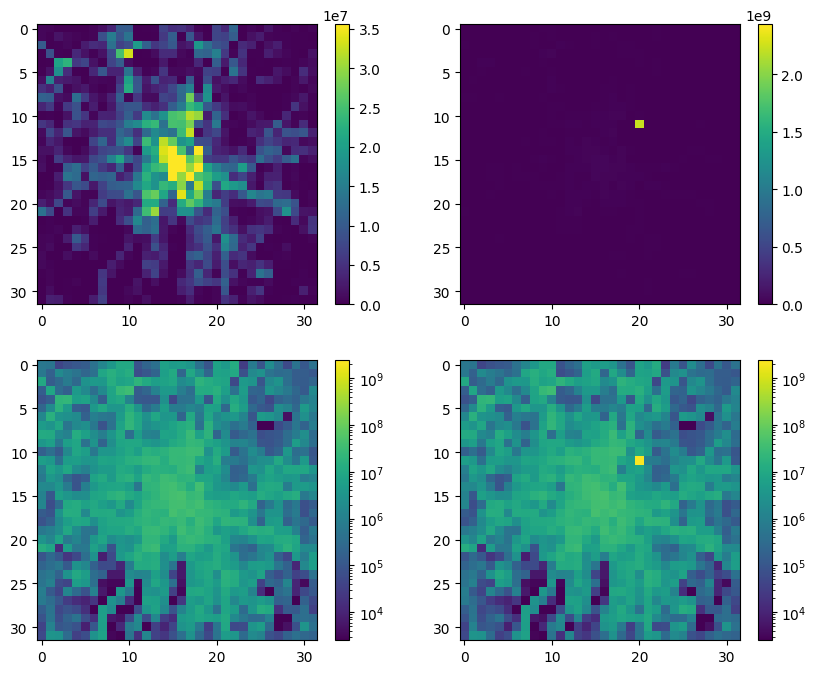

In [14]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

x = emission_field.co2_ff_area_sources_tensor
x_ps = x + emission_field.co2_ff_point_sources_tensor

v_max = 1.1 * x.max()
v_max_ps = 1.1 * x_ps.max()

plot_emission_field_tensor(x, vmax=v_max, ax=ax1, log_norm=False)
plot_emission_field_tensor(x_ps, vmax=v_max_ps, ax=ax2, log_norm=False)
plot_emission_field_tensor(x, vmax=v_max_ps, ax=ax3, log_norm=True)
plot_emission_field_tensor(x_ps, vmax=v_max_ps, ax=ax4, log_norm=True)